Load The Dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


In [13]:
# Load and Inspect Data 
import os
print("📁 Working Dir:", os.getcwd())
print("📄 Files:", os.listdir())

df = pd.read_csv("traffic_incidents.csv")
print("✅ Loaded:", df.shape)
df.head()


📁 Working Dir: d:\Project\Different Dataset and Regression Model
📄 Files: ['Calgary_Crimes_EDA', 'Calgary_Crime_EDA.ipynb', 'Gas_Turbine_Regression', 'Rent_Classifieds_EDA', 'rent_data.csv', 'Rent_EDA.ipynb', 'traffic_incidents.csv']
✅ Loaded: (54709, 10)


,INCIDENT INFO,DESCRIPTION,START_DT,MODIFIED_DT,QUADRANT,Longitude,Latitude,Count,id,Point
0,Westbound 16 Avenue at Deerfoot Trail NE,Stalled vehicle. Partially blocking the right...,2022/06/21 07:31:40 AM,2022/06/21 07:33:16 AM,NE,-114.026687,51.067485,1,2022-06-21T07:31:4051.067485129276236-114.0266...,POINT (-114.02668672232672 51.067485129276236)
1,11 Avenue and 4 Street SW,Traffic incident. Blocking multiple lanes,2022/06/21 04:02:11 AM,2022/06/21 04:12:38 AM,SW,-114.071481,51.042624,1,2022-06-21T04:02:1151.04262449261462-114.07148...,POINT (-114.07148057660925 51.04262449261462)
2,68 Street and Memorial Drive E,Traffic incident.,2022/06/20 11:53:08 PM,2022/06/20 11:55:42 PM,NE,-113.935553,51.052474,1,2022-06-20T23:53:0851.0524735056658-113.935553...,POINT (-113.935553325751 51.0524735056658)
3,Eastbound 16 Avenue and 36 Street NE,Traffic incident. Blocking the left shoulder,2022/06/20 04:43:21 PM,2022/06/20 05:17:05 PM,NE,-113.989219,51.067086,1,2022-06-20T16:43:2151.06708565896752-113.98921...,POINT (-113.98921905311566 51.06708565896752)
4,Barlow Trail and 61 Avenue SE,Traffic incident.,2022/06/20 04:42:12 PM,2022/06/20 05:28:21 PM,SE,-113.985727,50.998727,1,2022-06-20T16:42:1250.99872748477766-113.98572...,POINT (-113.98572655353505 50.99872748477766)


Clean And Prepare Data

In [14]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54709 entries, 0 to 54708
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INCIDENT INFO  54709 non-null  object 
 1   DESCRIPTION    54707 non-null  object 
 2   START_DT       54709 non-null  object 
 3   MODIFIED_DT    40652 non-null  object 
 4   QUADRANT       40650 non-null  object 
 5   Longitude      54709 non-null  float64
 6   Latitude       54709 non-null  float64
 7   Count          54709 non-null  int64  
 8   id             54709 non-null  object 
 9   Point          54709 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.2+ MB


INCIDENT INFO        0
DESCRIPTION          2
START_DT             0
MODIFIED_DT      14057
QUADRANT         14059
Longitude            0
Latitude             0
Count                0
id                   0
Point                0
dtype: int64

In [15]:
df['START_DT'] = pd.to_datetime(df['START_DT'], errors='coerce')

# Extract useful parts
df['Hour'] = df['START_DT'].dt.hour
df['Month'] = df['START_DT'].dt.month
df['DayOfWeek'] = df['START_DT'].dt.day_name()
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})


In [16]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("traffic_incidents.csv")

# Print all column names
print("📋 Column names:")
for col in df.columns:
    print("-", col)


📋 Column names:
- INCIDENT INFO
- DESCRIPTION
- START_DT
- MODIFIED_DT
- QUADRANT
- Longitude
- Latitude
- Count
- id
- Point


In [17]:
print(df.columns.tolist())


['INCIDENT INFO', 'DESCRIPTION', 'START_DT', 'MODIFIED_DT', 'QUADRANT', 'Longitude', 'Latitude', 'Count', 'id', 'Point']


Answer Key Questions : Which Neighborhoods Have Most Incidents?

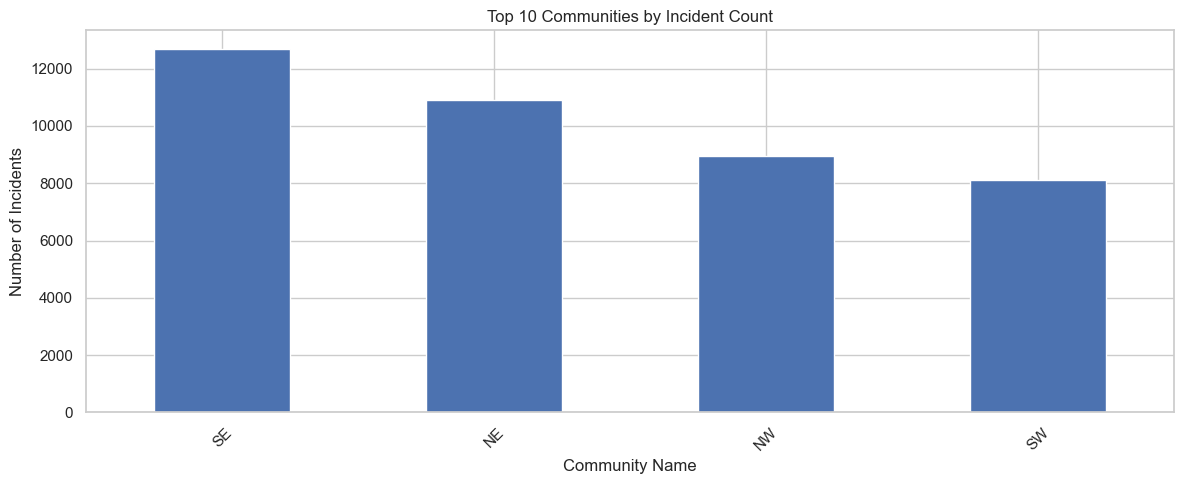

In [18]:
plt.figure(figsize=(12, 5))
df['QUADRANT'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Communities by Incident Count')
plt.xlabel('Community Name')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Time of Day – When Are Incidents Most Common?

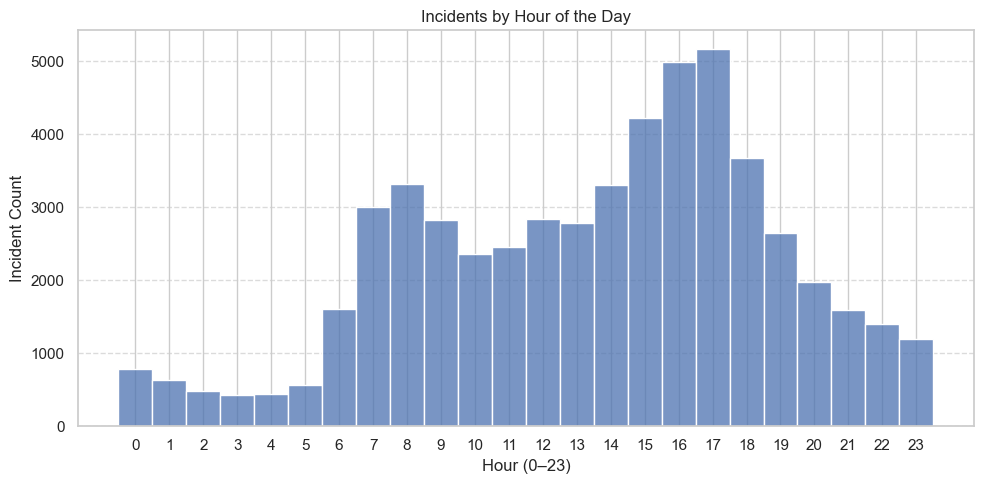

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure START_DT is in datetime format
df['START_DT'] = pd.to_datetime(df['START_DT'], errors='coerce')

# Extract hour from START_DT
df['Hour'] = df['START_DT'].dt.hour

# Plot histogram of incidents by hour
plt.figure(figsize=(10, 5))
sns.histplot(df['Hour'].dropna(), bins=24, kde=False, discrete=True)
plt.title('Incidents by Hour of the Day')
plt.xlabel('Hour (0–23)')
plt.ylabel('Incident Count')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Adding a Season Column

In [20]:
import pandas as pd

# Convert to datetime
df['START_DT'] = pd.to_datetime(df['START_DT'])

# Extract month
df['Month'] = df['START_DT'].dt.month

# Map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)


Are There Seasonal Patterns?

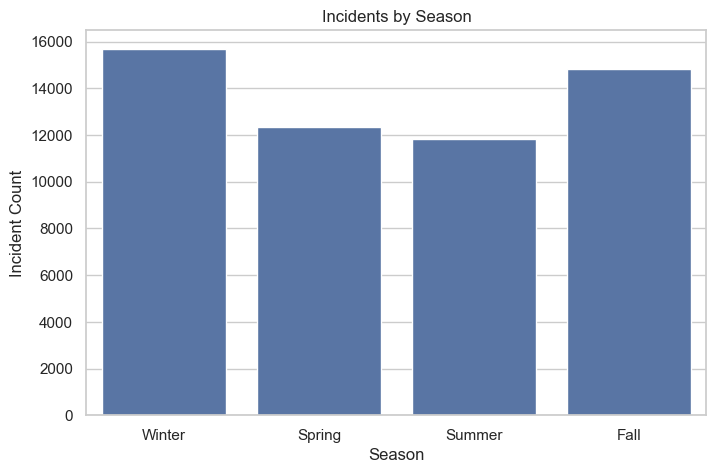

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Season', data=df, order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Incidents by Season')
plt.ylabel('Incident Count')
plt.show()


### Observations:
- Most traffic incidents occur in the SE.
- Incidents are most frequent during Evening(4-6PM) rush hours.
- Winter shows a noticeable spike in incidents, possibly due to weather.
